In [20]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt

In [21]:
lai_fname = "/short/w35/mm3972/cable/runs/EucFACE/Eucface_data/met_July2019/eucLAI.csv"

In [22]:
co2_conc = "amb"

In [23]:
df_lai = pd.read_csv(lai_fname, usecols = ['ring','Date','LAIsmooth']) # daily data
if co2_conc == "amb":
    subset = df_lai[df_lai['ring'].isin(['2','3','6'])]
elif co2_conc == "ele":
    subset = df_lai[df_lai['ring'].isin(['1','4','5'])]
subset = subset.groupby(by=["Date"])['LAIsmooth'].mean()

In [24]:
tmp = pd.DataFrame(subset.values, columns=['LAI'])
tmp['month'] = subset.values
tmp['day']   = subset.values
for i in np.arange(0,len(tmp['LAI']),1):
    tmp['month'][i] = subset.index[i][5:7]
    tmp['day'][i]   = subset.index[i][8:10]
tmp = tmp.groupby(by=['month','day'])['LAI'].mean()

In [25]:
rate = subset[-1]/tmp[(4)][(27)]

day_len_1 = (pd.datetime(2019,7,1) - pd.datetime(2012,12,31)).days
day_len_2 = (pd.datetime(2018,4,27) - pd.datetime(2012,12,31)).days
day_len_3 = (pd.datetime(2013,1,1) - pd.datetime(2012,10,26)).days
day_len_4 = (pd.datetime(2019,1,1) - pd.datetime(2013,1,1)).days
day_len_5 = (pd.datetime(2019,2,28) - pd.datetime(2012,12,31)).days

lai = pd.DataFrame(np.arange(np.datetime64('2013-01-01','D'), np.datetime64('2019-07-02','D')),\
      columns=['date'])
lai['LAI'] = np.zeros(day_len_1)
lai['LAI'][:day_len_2]          = subset[day_len_3:].values # 2013,1,1 - 2018,4,27
lai['LAI'][day_len_2:day_len_4] = tmp.values[118:]*rate # 2018,4,28-2018,12,31
lai['LAI'][day_len_4:day_len_5] = tmp.values[:59]*rate # 2019,1,1-2019,2,28
lai['LAI'][day_len_5:]          = tmp.values[60:183]*rate # 2019,3,1-2019,7,1

/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/short/w35/mm3972/anaconda3/

In [26]:
date = lai['date'] - np.datetime64('2013-01-01T00:00:00')
lai['Date']  = np.zeros(len(lai))
for i in np.arange(0,len(lai),1):
    lai['Date'][i] = date.iloc[i].total_seconds()

/short/w35/mm3972/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
lai.head()

,date,LAI,Date
0,2013-01-01,1.507726,0.0
1,2013-01-02,1.511173,86400.0
2,2013-01-03,1.514616,172800.0
3,2013-01-04,1.518057,259200.0
4,2013-01-05,1.521493,345600.0


In [28]:
grid_x = np.arange(0.,204940800.,1800) # 204505200

In [29]:
LAI = np.interp(grid_x, lai['Date'].values, lai['LAI'].values)

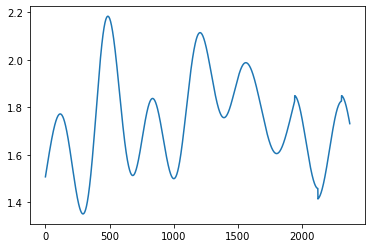

In [30]:
plt.plot(lai['LAI'])

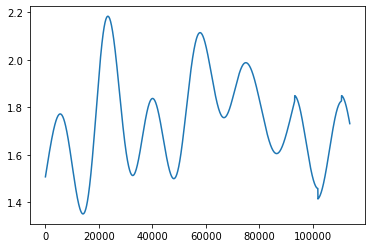

In [31]:
plt.plot(LAI)